

<a href='https://erdogant.medium.com/membership' target='_blank'><img height='200' style='border:0px;height:36px;' src='https://erdogant.github.io/clusteval/pages/html/_images/logo_large_3.png' border='0' alt='Follow me on Medium' /></a>


Welcome to the notebook of **clusteval**. Clusteval is a Python package for **unsupervised cluster evaluation**. Three well known methods are implemented that can be used to measure the goodness of the clustering approach; *silhouette*, *dbindex*, and *derivative*. The evaluation approaches can be applied on the most commonly used clustering approaches; *agglomerative*, *kmeans*, *dbscan* and *hdbscan*. There is no golden rule to define the optimal number of clusters. It requires investigation, and backtesting.

There are a couple of common methods that can help you:
<br>
<b>* Silhouette-score</b>
<br>
<b>* Inconsistency method</b>
<br>
<b>* Davies-Bouldin index</b>
<br>



---

## Read the Medium blog for more detailed information.

#### [1. A step-by-step guide for clustering images](https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128)

#### [2. Detection of Duplicate Images Using Image Hash Functions](https://towardsdatascience.com/detection-of-duplicate-images-using-image-hash-functions-4d9c53f04a75)

#### [3. From Data to Clusters: When is Your Clustering Good Enough?](https://towardsdatascience.com/from-data-to-clusters-when-is-your-clustering-good-enough-5895440a978a)

#### [4. From Clusters To Insights; The Next Step](https://towardsdatascience.com/from-clusters-to-insights-the-next-step-1c166814e0c6)


---

## Github
* [Github](https://github.com/erdogant/clusteval)
* [Documentation pages](https://erdogant.github.io/clusteval/)

---



**Installation of libraries**

In [1]:
# Easy import of data sets
!pip install datazets

# One-hot encoding
!pip install df2onehot

# PCA analysis. Create explainable biplots
!pip install pca

# Clustering with automatic evaluation
!pip install clusteval

# Making beautifull scatter plots
!pip install scatterd

# Making beautifull interactive scatter plots
!pip install d3blocks

# HNET for association analysis for the clusterlabels
! pip install hnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 3.0.4 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 8.9 MB/s eta 0:00:00


In [2]:
# Libraries
import numpy as np
import pandas as pd

# Clustering with automatic evaluation
from clusteval import clusteval

# Making beautifull scatter plots
from scatterd import scatterd

# Easy import of data sets
import datazets as dz

# Convert to one-hot array
from df2onehot import df2onehot

# D3blocks
from d3blocks import D3Blocks, normalize


# Import data set

In this notebook we are going to analyze the [Data Science salary data set](https://www.kaggle.com/code/dima806/aiml-salaries-2022-2023-explain/notebook) set from kaggle.

In [3]:
# Import library
import datazets as dz
# Get the data science salary data set
df = dz.get('ds_salaries.zip')

# The features are as following
df.columns

# 'work_year'          > The year the salary was paid.
# 'experience_level'   > The experience level in the job during the year.
# 'employment_type'    > Type of employment: Part-time, full time, contract or freelance.
# 'job_title'          > Name of the role.
# 'salary'             > Total gross salary amount paid.
# 'salary_currency'    > Currency of the salary paid (ISO 4217 code).
# 'salary_in_usd'      > Converted salary in USD.
# 'employee_residence' > Primary country of residence.
# 'remote_ratio'       > Remote work: less than 20%, partially, more than 80%
# 'company_location'   > Country of the employer's main office.
# 'company_size'       > Average number of people that worked for the company during the year.

# Selection of only European countries
countries_europe = ['SM', 'DE', 'GB', 'ES', 'FR', 'RU', 'IT', 'NL', 'CH', 'CF', 'FI', 'UA', 'IE', 'GR', 'MK', 'RO', 'AL', 'LT', 'BA', 'LV', 'EE', 'AM', 'HR', 'SI', 'PT', 'HU', 'AT', 'SK', 'CZ', 'DK', 'BE', 'MD', 'MT']
df['europe'] = np.isin(df['company_location'], countries_europe)


[d3blocks] >INFO> Import dataset [ds_salaries.zip]
[d3blocks] >INFO> Downloading [ds_salaries.zip] dataset from github source..


In [4]:
# Store salary in separate target variable.
y = df['salary_in_usd']

# Remove redundant variables
df.drop(labels=['salary_currency', 'salary', 'salary_in_usd'], inplace=True, axis=1)

# Make the catagorical variables better to understand.
df['experience_level'] = df['experience_level'].replace({'EN':'Entry-level', 'MI':'Junior Mid-level', 'SE':'Intermediate Senior-level', 'EX':'Expert Executive-level / Director'}, regex=True)
df['employment_type'] = df['employment_type'].replace({'PT':'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'}, regex=True)
df['company_size'] = df['company_size'].replace({'S':'Small (less than 50)', 'M':'Medium (50 to 250)', 'L':'Large (>250)'}, regex=True)
df['remote_ratio'] = df['remote_ratio'].replace({0:'No remote', 50:'Partially remote', 100:'>80% remote'}, regex=True)
df['work_year'] = df['work_year'].astype(str)

df.shape
# (4134, 9)

(4134, 9)

In [5]:
df

work_year           experience_level employment_type  \
0         2023           Junior Mid-level       Full-time   
1         2023  Intermediate Senior-level       Full-time   
2         2023  Intermediate Senior-level       Full-time   
3         2023  Intermediate Senior-level       Full-time   
4         2023  Intermediate Senior-level       Full-time   
...        ...                        ...             ...   
4129      2020  Intermediate Senior-level       Full-time   
4130      2021           Junior Mid-level       Full-time   
4131      2020                Entry-level       Full-time   
4132      2020                Entry-level        Contract   
4133      2021  Intermediate Senior-level       Full-time   

                     job_title employee_residence      remote_ratio  \
0           AWS Data Architect                 US       >80% remote   
1               Data Scientist                 US         No remote   
2               Data Scientist                 US         No remote   
3                Data Engineer                 US       >80% remote   
4                Data Engineer                 US       >80% remote   
...                        ...                ...               ...   
4129            Data Scientist                 US       >80% remote   
4130  Principal Data Scientist                 US       >80% remote   
4131            Data Scientist                 US       >80% remote   
4132     Business Data Analyst                 US       >80% remote   
4133      Data Science Manager                 IN  Partially remote   

     company_location          company_size  europe  
0                  US          Large (>250)   False  
1                  US    Medium (50 to 250)   False  
2                  US    Medium (50 to 250)   False  
3                  US    Medium (50 to 250)   False  
4                  US    Medium (50 to 250)   False  
...               ...                   ...     ...  
4129               US          Large (>250)   False  
4130               US          Large (>250)   False  
4131               US  Small (less than 50)   False  
4132               US          Large (>250)   False  
4133               IN          Large (>250)   False  

[4134 rows x 9 columns]

In [6]:
# One hot encoding and removing any multicollinearity to prevent the dummy trap.
dfhot = df2onehot(df,
                  remove_multicollinearity=True,
                  y_min=5,
                  verbose=4)['onehot']

dfhot


[df2onehot] >Auto detecting dtypes.
[df2onehot] >[work_year]          > [obj]   > [cat] [4]
[df2onehot] >[experience_level]   > [obj]   > [cat] [4]
[df2onehot] >[employment_type]    > [obj]   > [cat] [4]
[df2onehot] >[job_title]          > [obj]   > [cat] [99]
[df2onehot] >[employee_residence] > [obj]   > [cat] [80]
[df2onehot] >[remote_ratio]       > [obj]   > [cat] [3]
[df2onehot] >[company_location]   > [obj]   > [cat] [74]
[df2onehot] >[company_size]       > [obj]   > [cat] [3]
[df2onehot] >[europe]             > [bool]   > [bool] [2]
[df2onehot] >Set dtypes in dataframe..
[df2onehot] >work_year
[df2onehot] >experience_level
[df2onehot] >employment_type
[df2onehot] >job_title
[df2onehot] >employee_residence
[df2onehot] >remote_ratio
[df2onehot] >company_location
[df2onehot] >company_size
[df2onehot] >europe
[df2onehot] >Processing: work_year........... [4]
[df2onehot] >Remove multicollinearity for [work_year]
[df2onehot] >Processing: experience_level.... [4]
[df2onehot] >Remove mu

work_year_2021  work_year_2022  work_year_2023  \
0              False           False            True   
1              False           False            True   
2              False           False            True   
3              False           False            True   
4              False           False            True   
...              ...             ...             ...   
4129           False           False           False   
4130            True           False           False   
4131           False           False           False   
4132           False           False           False   
4133            True           False           False   

      experience_level_Expert Executive-level / Director  \
0                                                 False    
1                                                 False    
2                                                 False    
3                                                 False    
4                                                 False    
...                                                 ...    
4129                                              False    
4130                                              False    
4131                                              False    
4132                                              False    
4133                                              False    

      experience_level_Intermediate Senior-level  \
0                                          False   
1                                           True   
2                                           True   
3                                           True   
4                                           True   
...                                          ...   
4129                                        True   
4130                                       False   
4131                                       False   
4132                                       False   
4133                                        True   

      experience_level_Junior Mid-level  employment_type_Freelance  \
0                                  True                      False   
1                                 False                      False   
2                                 False                      False   
3                                 False                      False   
4                                 False                      False   
...                                 ...                        ...   
4129                              False                      False   
4130                               True                      False   
4131                              False                      False   
4132                              False                      False   
4133                              False                      False   

      employment_type_Full-time  employment_type_Part-time  \
0                          True                      False   
1                          True                      False   
2                          True                      False   
3                          True                      False   
4                          True                      False   
...                         ...                        ...   
4129                       True                      False   
4130                       True                      False   
4131                       True                      False   
4132                      False                      False   
4133                       True                      False   

      job_title_AI Developer  ...  company_location_NG  company_location_NL  \
0                      False  ...                False                False   
1                      False  ...                False                False   
2                      False  ...                False                False   
3                      False  ...                False                False   
4     

# PCA analysis

In [7]:
# Import library
from pca import pca

# Initialize
model = pca(normalize=False)

# Fit model using PCA
results = model.fit_transform(dfhot)

[pca] >[WARNING]: Sparse or one-hot boolean input data is detected, it is highly recommended to set onehot=True or alternatively, normalize=True
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [116] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [37] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [116] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[37]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 4000x3000 with 1 Axes>,
 <Axes: title={'center': '37 Principal Components explain [95.23%] of the variance'}, xlabel='PC1 (19.3% expl.var)', ylabel='PC2 (14.6% expl.var)'>)

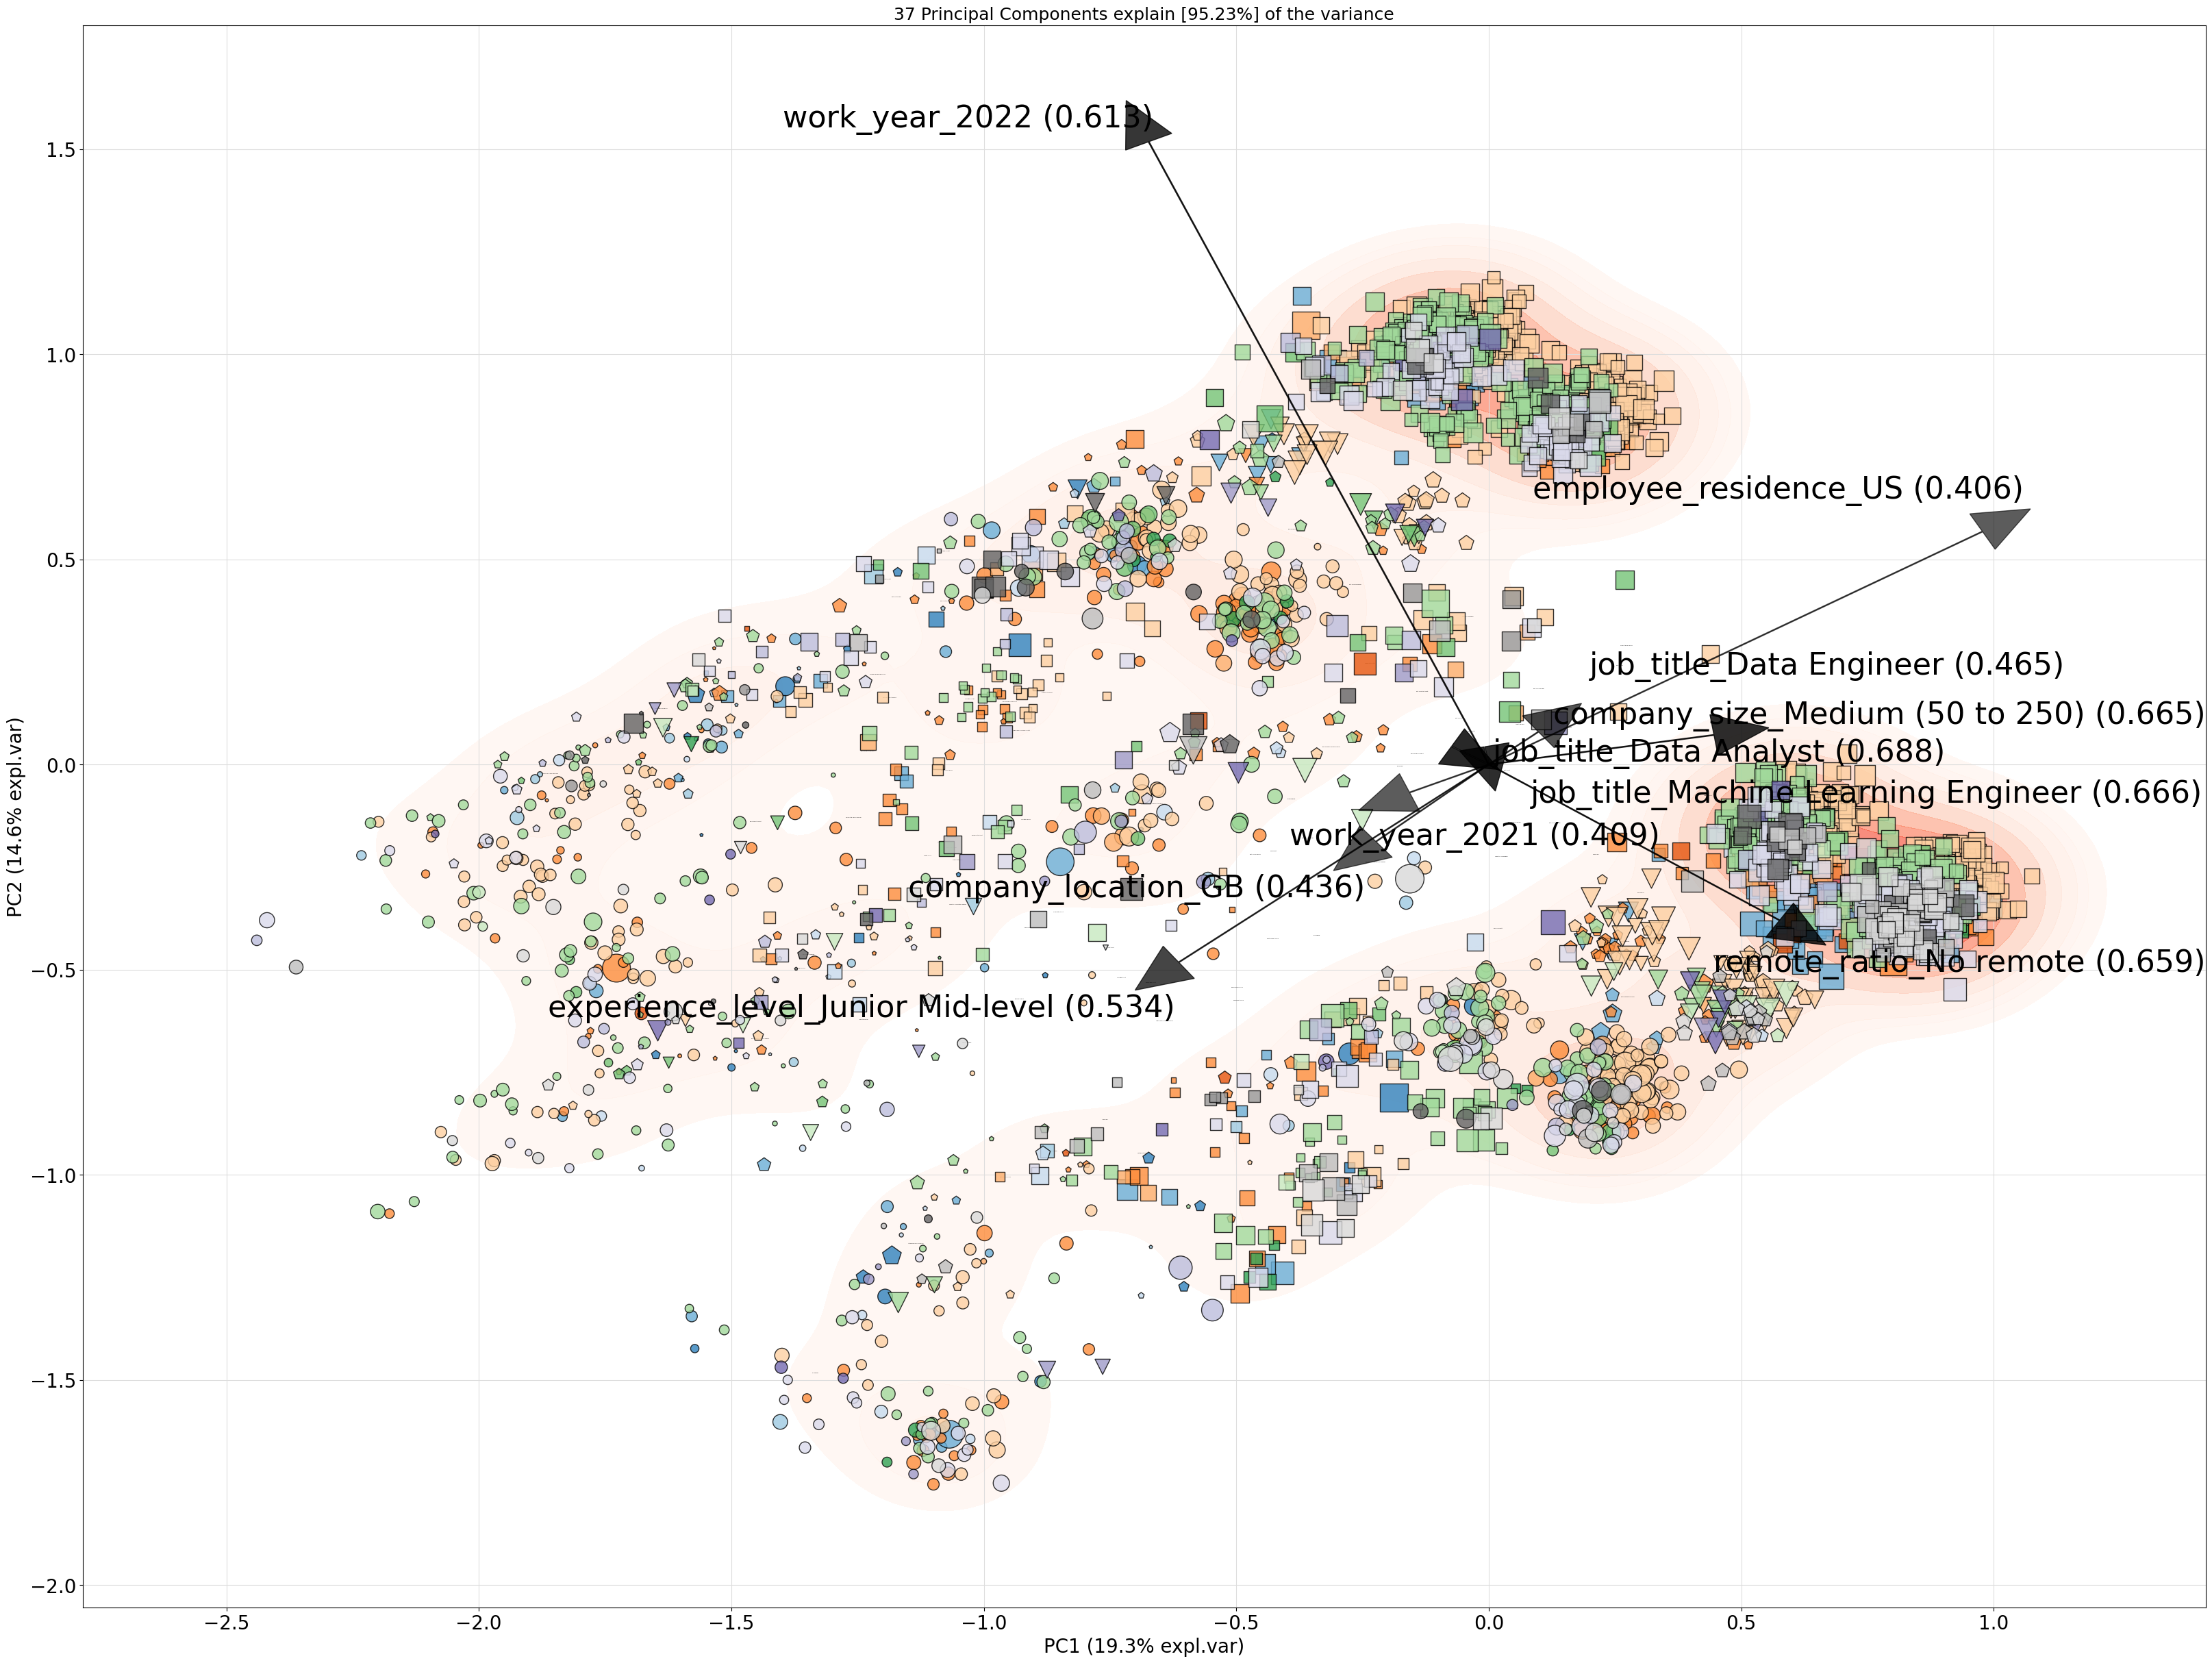

In [8]:
# Make biplot
model.biplot(labels=df['job_title'],
             s=y/500,
             marker=df['experience_level'],
             n_feat=10,
             density=True,
             fontsize=0,
             jitter=0.05,
             alpha=0.8,
             color_arrow='#000000',
             arrowdict={'color_text': '#000000', 'fontsize': 32},
             figsize=(40, 30),
             verbose=3,
             )

[d3blocks] >DEBUG> Set verbose to 10
[d3blocks] >DEBUG> Colors are all set to [0, 0.1, 0.4].
[d3blocks] >DEBUG> Colors are based on the input [labels] and on [cmap].


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 4000x3000 with 1 Axes>,
 <Axes: title={'center': '37 Principal Components explain [95.23%] of the variance'}, xlabel='PC1 (19.3% expl.var)', ylabel='PC2 (14.6% expl.var)'>)

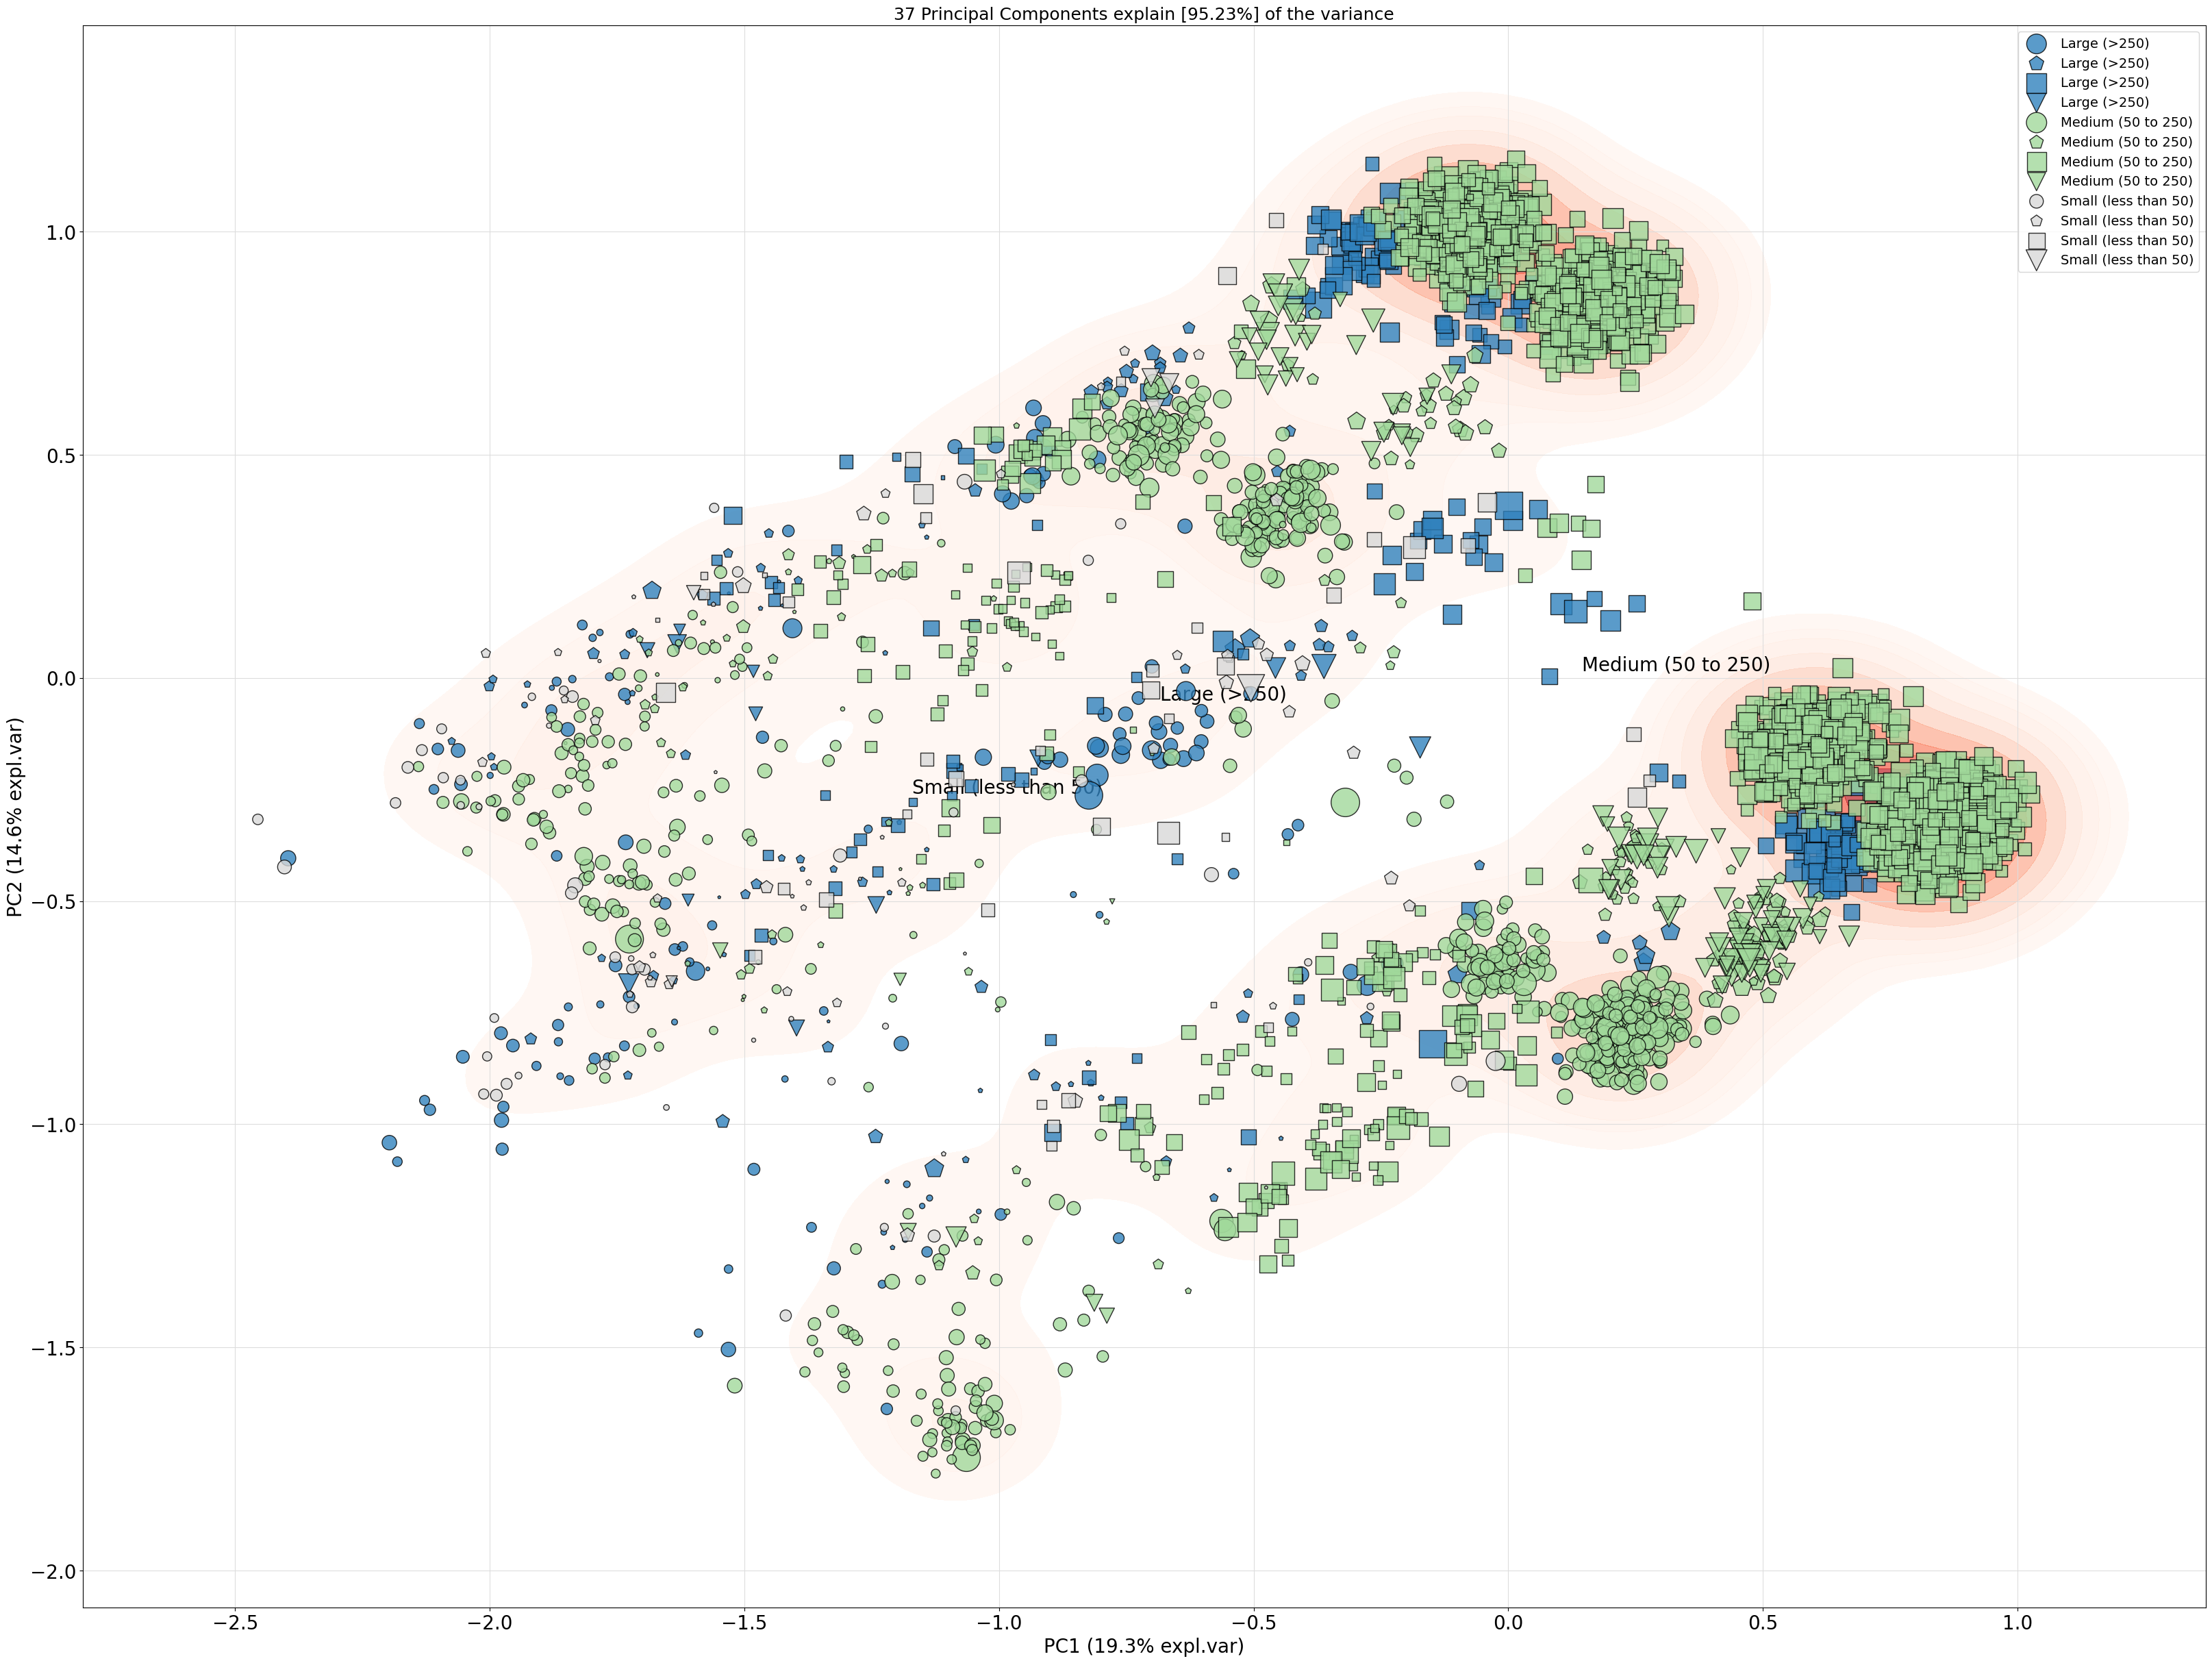

In [9]:
# Import library
from scatterd import scatterd

# Create various scatter plots with different coloring.
model.scatter(labels=df['company_size'],
             s=y/500,
             marker=df['experience_level'],
             density=True,
             fontsize=20,
             jitter=0.05,
             alpha=0.8,
             figsize=(40, 30),
             verbose=4,
             grid=True,
             legend=True,
             )

## Dimensionality Reduction

In [10]:
# Import libraries
from scatterd import scatterd
from sklearn.manifold import TSNE

# Remove work year from dataframe
df.drop(labels=['work_year'], inplace=True, axis=1)

# Create new one hot matrix without work year
dfhot = df2onehot(df, remove_multicollinearity=True, y_min=5, verbose=4)['onehot']

# Feature embedding using tSNE
X = TSNE(n_components=2, init='pca', perplexity=100).fit_transform(dfhot.values)


[df2onehot] >Auto detecting dtypes.
[df2onehot] >[experience_level]   > [obj]   > [cat] [4]
[df2onehot] >[employment_type]    > [obj]   > [cat] [4]
[df2onehot] >[job_title]          > [obj]   > [cat] [99]
[df2onehot] >[employee_residence] > [obj]   > [cat] [80]
[df2onehot] >[remote_ratio]       > [obj]   > [cat] [3]
[df2onehot] >[company_location]   > [obj]   > [cat] [74]
[df2onehot] >[company_size]       > [obj]   > [cat] [3]
[df2onehot] >[europe]             > [bool]   > [bool] [2]
[df2onehot] >Set dtypes in dataframe..
[df2onehot] >experience_level
[df2onehot] >employment_type
[df2onehot] >job_title
[df2onehot] >employee_residence
[df2onehot] >remote_ratio
[df2onehot] >company_location
[df2onehot] >company_size
[df2onehot] >europe
[df2onehot] >Processing: experience_level.... [4]
[df2onehot] >Remove multicollinearity for [experience_level]
[df2onehot] >Processing: employment_type..... [4]
[df2onehot] >Remove multicollinearity for [employment_type]
[df2onehot] >Processing: job_title

[clustimage] >WARNING> Colormap [tab20c] can not create [99] unique colors! Available unique colors: [20].
[d3blocks] >WARNING> Colormap [tab20c] can not create [99] unique colors! Available unique colors: [20].
[clustimage] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


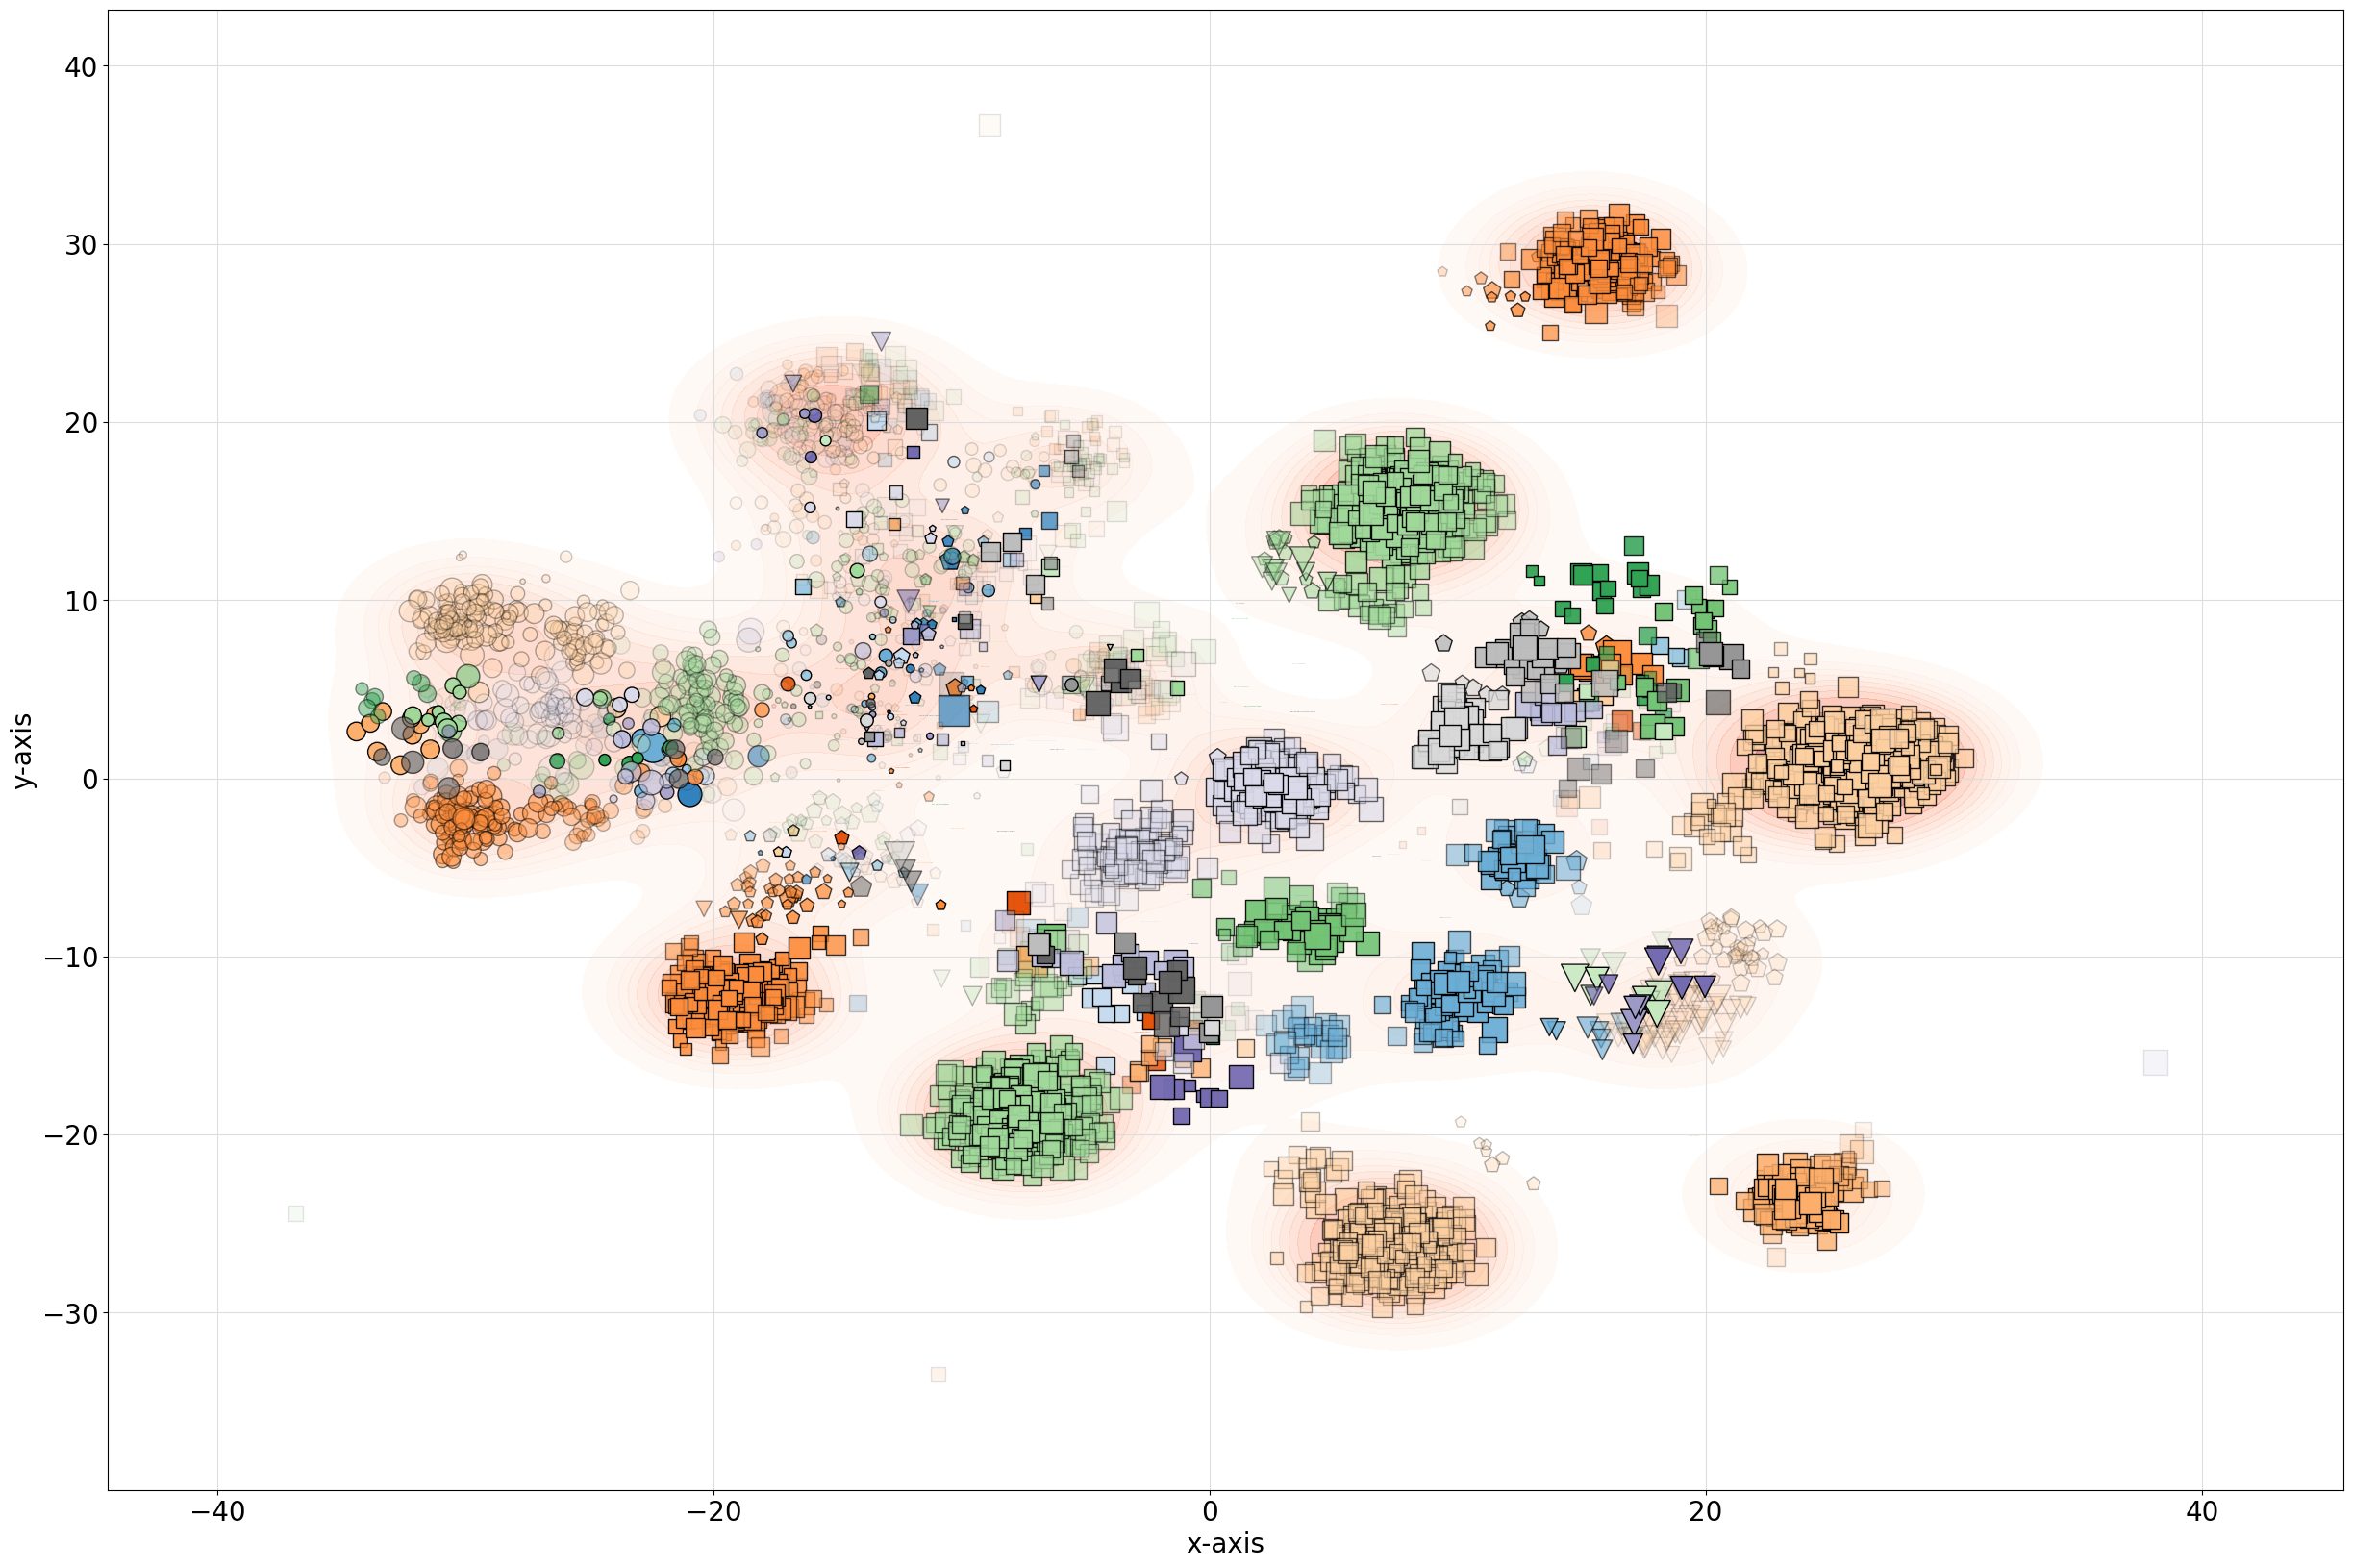

In [15]:
# Import library
fig, ax = scatterd(X[:, 0],
                   X[:, 1],
                   marker=df['experience_level'],
                   s=y/800,
                   labels=df['job_title'],
                   fontsize=0,
                   density=True,
                   args_density={'alpha': 0.4},
                   gradient='opaque',
                   edgecolor='#000000',
                   jitter=1,
                   grid=True,
                   legend=False,
                   figsize=(30, 20),
                   )

In [44]:

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(1, 10))

# Fit and transform the data
y_normalized = scaler.fit_transform(y.values.reshape(-1,1))

y_normalized

array([[7.68411304],
       [6.94231997],
       [5.40028952],
       ...,
       [4.24489062],
       [4.13249773],
       [4.01257452]])

In [45]:
# Import library
from d3blocks import D3Blocks
d3 = D3Blocks()

d3.scatter(X[:, 0],
           X[:, 1],
           size=y_normalized,
           notebook=True,
           color=df['job_title'],
           c_gradient=None, #'opaque',
           tooltip=df['job_title'],
           scale=True,
           jitter=0.1,
           figsize=(1100, 800),
           )


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Scatter]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Scaling xy-coordinates.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Display in notebook using IPython.


In [48]:
from clusteval import clusteval
# Initialize
ce = clusteval(cluster='dbscan', metric='euclidean', linkage='complete', min_clust=3, normalize=True, verbose='info')
# Fit
results = ce.fit(X)

[d3blocks] >INFO> Normalizing input data per feature (zero mean and unit variance)
[d3blocks] >INFO> Saving data in memory.
[d3blocks] >INFO> Fit with method=[dbscan], metric=[euclidean], linkage=[complete]
[d3blocks] >INFO> Gridsearch across Epsilon.
[d3blocks] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [01:37<00:00,  2.51it/s]
[d3blocks] >INFO> Compute dendrogram threshold.
[d3blocks] >INFO> Optimal number clusters detected: [25].
[d3blocks] >INFO> Fin.


In [49]:
# Enrichment analysis
results_enrichment = ce.enrichment(df)

[hnet] >Start making fit..
[hnet] >Converting boolean values..
[hnet] >Set parameter <excl_background> to: ['0.0'].

[df2onehot] >Auto detecting dtypes.


100%|██████████| 8/8 [00:00<00:00, 56.44it/s]

[df2onehot] >Set dtypes in dataframe..
[hnet] >Analyzing [cat] experience_level....

.....................
[hnet] >Analyzing [cat] employment_type.........................
[hnet] >Analyzing [cat] job_title.........................
[hnet] >Analyzing [cat] employee_residence.........................
[hnet] >Analyzing [cat] remote_ratio.........................
[hnet] >Analyzing [cat] company_location.........................
[hnet] >Analyzing [cat] company_size.........................
[hnet] >Analyzing [cat] europe.........................
[hnet] >Multiple test correction using holm
[hnet] >Fin


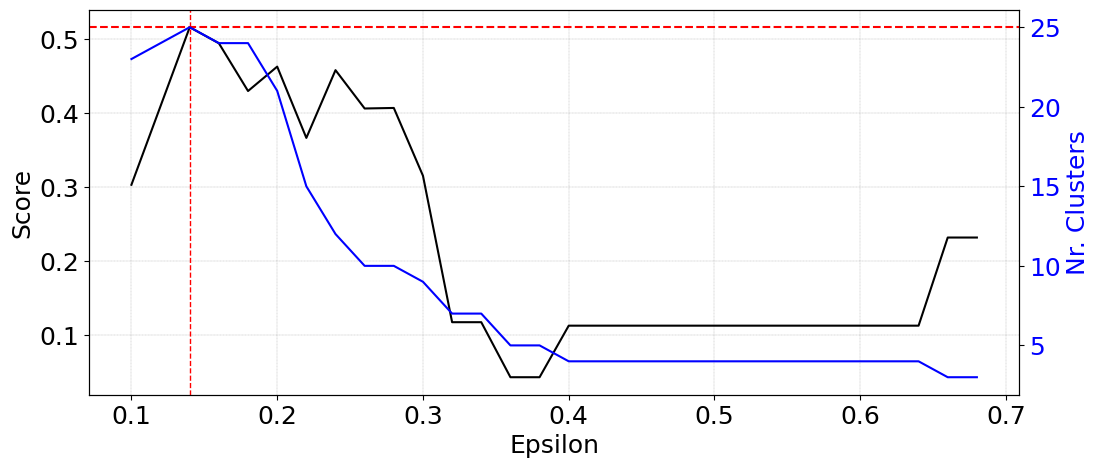

[d3blocks] >INFO> Retrieving input data set.
[d3blocks] >INFO> Coordinates (x, y) are set based on the first two features.
[d3blocks] >INFO> Estimated number of n_clusters: 24, average silhouette_score=0.461
[clustimage] >WARNING> Colormap [tab20c] can not create [25] unique colors! Available unique colors: [20].
[d3blocks] >WARNING> Colormap [tab20c] can not create [25] unique colors! Available unique colors: [20].


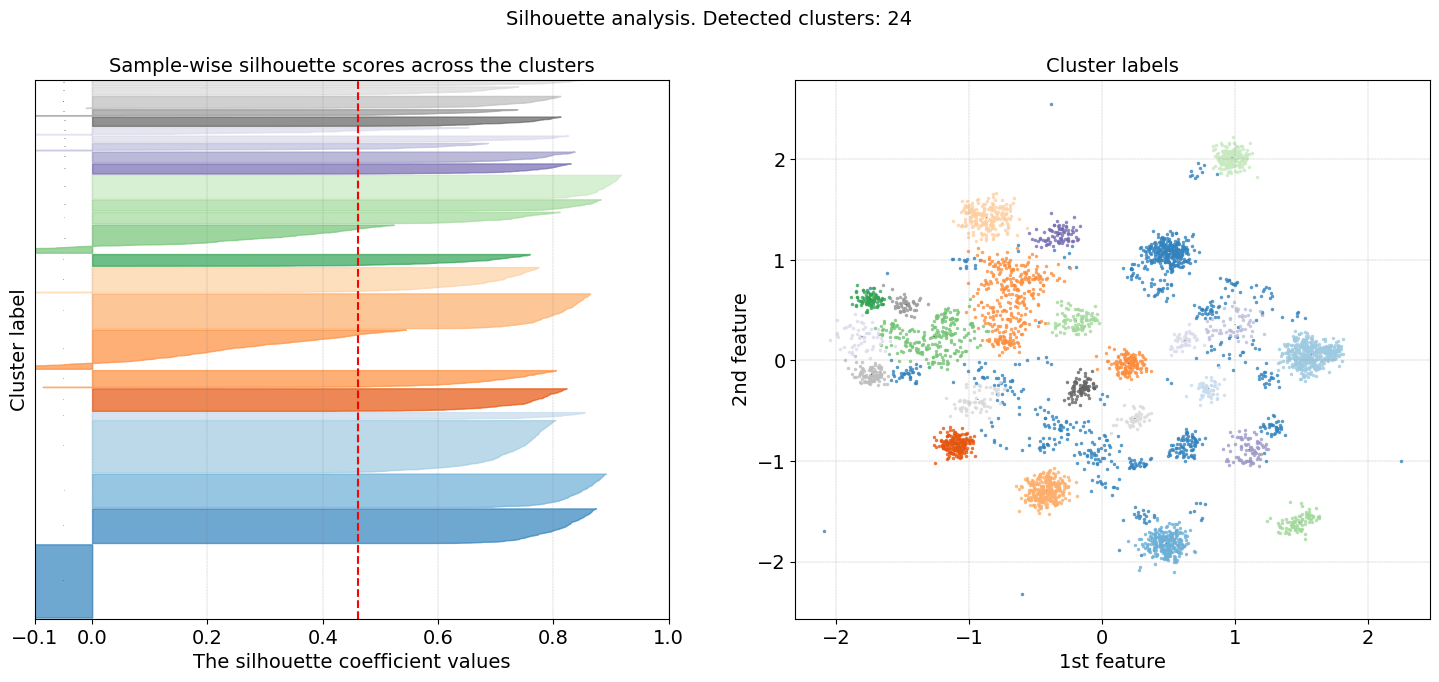

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [50]:
# Gridsearch plot for optimal number of clusters
ce.plot(figsize=(12,5))
# silhouette plot
ce.plot_silhouette(jitter=0.05)

In [ ]:
# Scatter plot
ce.scatter(n_feat=4, s=y/500, jitter=0.05, fontsize=14, density=True, params_scatterd={'marker':df['experience_level'], 'gradient':'opaque', 'dpi':200}, figsize=(40,30))


[d3blocks] >INFO> Retrieving input data set.
[d3blocks] >INFO> Coordinates (x, y) are set based on the first two features.
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 8000x6000 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

[d3blocks] >INFO> Retrieving input data set.
[d3blocks] >INFO> Coordinates (x, y) are set based on the first two features.
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 8000x6000 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

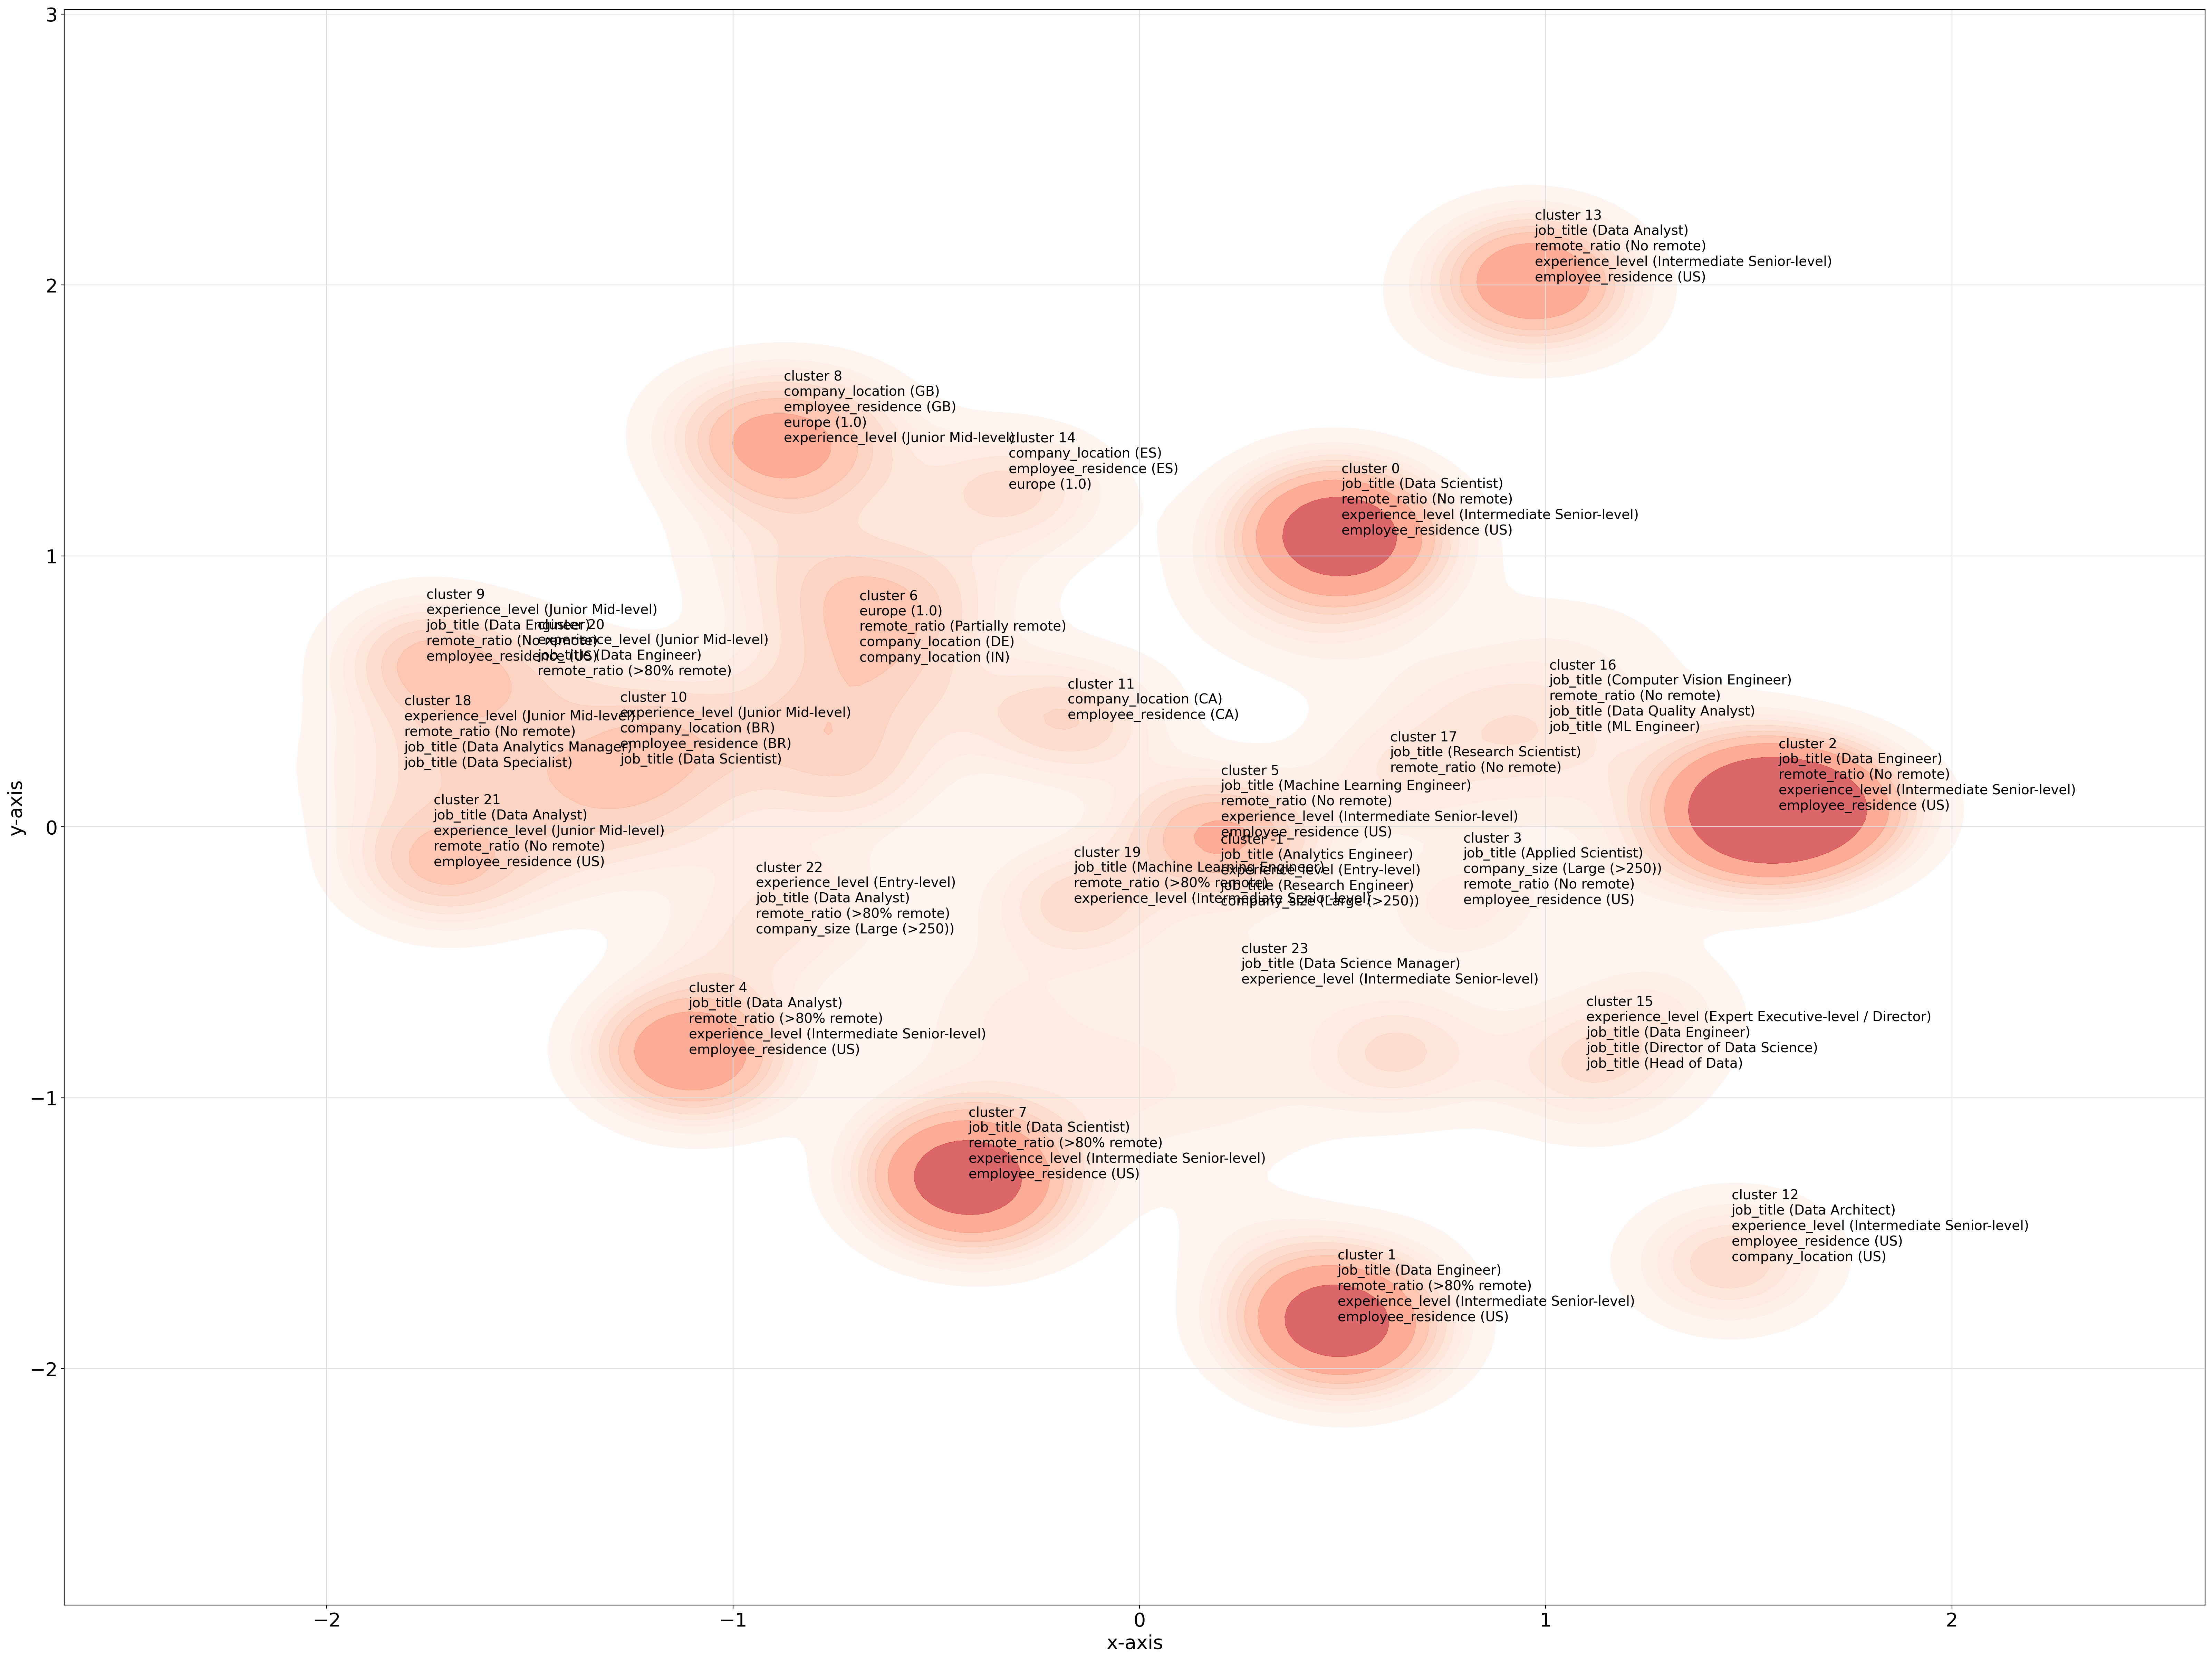

In [52]:
ce.scatter(n_feat=4,
           s=0,
           jitter=0.05,
           fontsize=14,
           density=True,
           params_scatterd={'marker':df['experience_level'], 'gradient':'opaque', 'dpi':200},
           figsize=(40,30))


[d3blocks] >INFO> Retrieving input data set.
[d3blocks] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=complete, max_d=0.850. Be patient now..
[d3blocks] >INFO> Compute cluster labels.


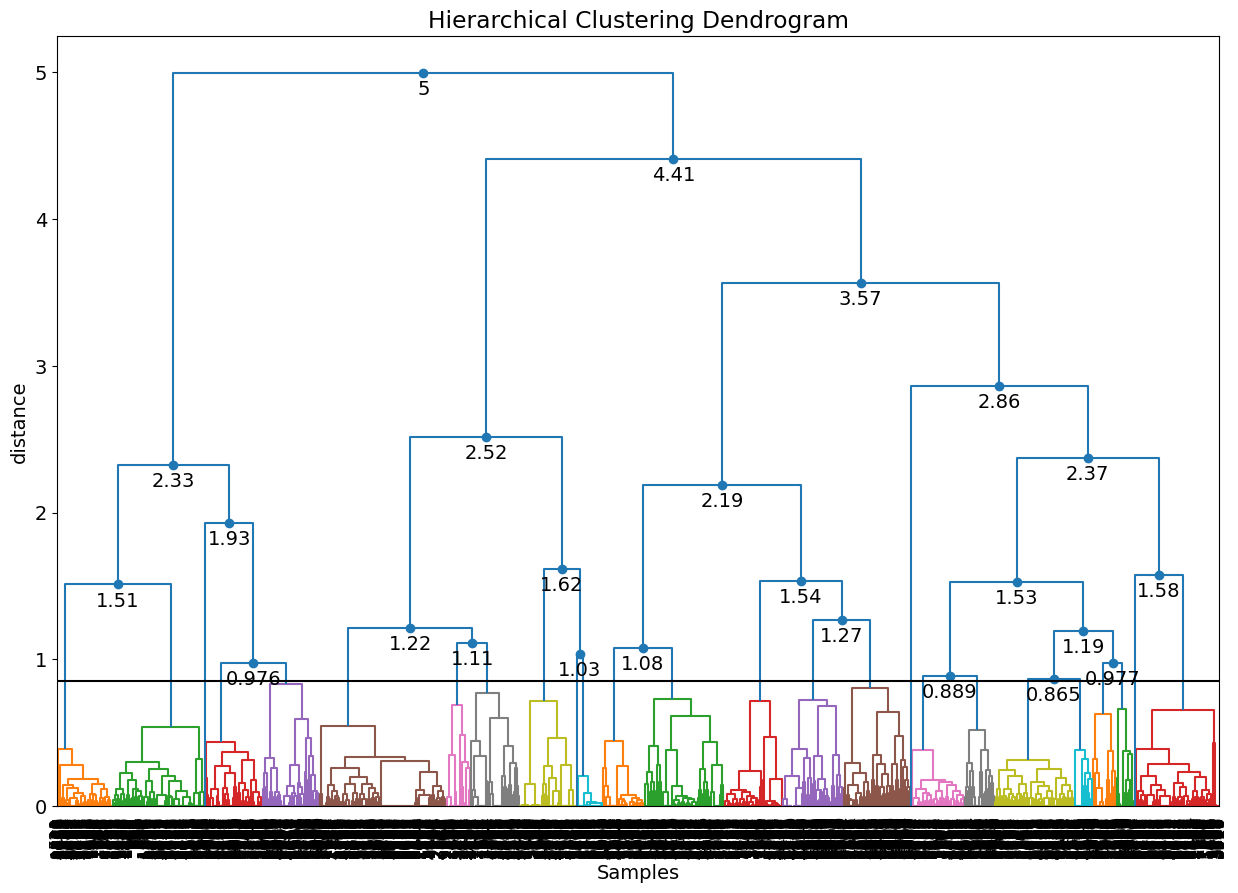

In [ ]:
ce.dendrogram();


In [ ]:
# Fin